In [2]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data

data = pd.read_csv("student-mat.csv")

df = data.copy()

In [4]:
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
315,GP,F,19,R,GT3,T,2,3,other,other,...,4,1,2,1,1,3,40,13,11,11
195,GP,F,17,U,LE3,T,2,4,services,services,...,4,3,2,1,1,5,0,14,15,15
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8
179,GP,M,17,U,GT3,T,4,3,other,other,...,5,2,3,1,1,2,4,10,10,11
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11


In [5]:
df.shape

(395, 33)

In [6]:
# check for missing values

df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<Axes: >

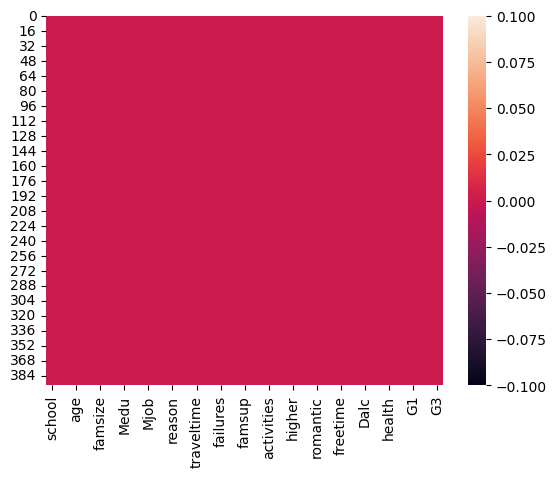

In [7]:
# check for duplicates

sns.heatmap(data = df.isnull())

## Feature selecting

In [8]:
df2 =df.copy()
df2.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
294,GP,M,18,R,LE3,T,3,2,services,other,...,5,4,2,1,1,4,8,14,13,14
120,GP,F,15,U,GT3,T,1,2,at_home,services,...,3,2,3,1,2,1,2,16,15,15
330,GP,M,18,U,LE3,T,2,2,other,other,...,4,5,5,2,4,5,2,9,8,8
177,GP,M,17,U,GT3,T,3,3,other,other,...,4,3,4,1,4,4,4,6,5,6
244,GP,F,18,U,GT3,T,2,1,other,other,...,4,4,4,1,1,3,0,7,0,0


In [9]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
columns_to_label_encode = ["famsize","sex", "school", "address", "Pstatus", "Mjob", "Fjob", 
                           "romantic", "internet", "higher", "nursery", "activities", 
                           "paid", "guardian", "reason", "famsup","schoolsup"]
# "grade","G1","G2"
# Initialize LabelEncoder
le = LabelEncoder()


# Apply Label Encoding to each column in the list
for column in columns_to_label_encode:
    df2[column] = le.fit_transform(df[column])

In [10]:
df2.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
243,0,1,16,1,0,1,4,4,3,3,...,5,3,2,1,2,5,0,13,12,12
44,0,0,16,1,1,1,2,2,2,0,...,4,3,3,2,2,5,14,10,10,9
260,0,0,18,1,0,1,4,3,3,2,...,3,1,2,1,3,2,21,17,18,18
209,0,0,17,0,0,1,4,3,4,2,...,4,4,2,1,1,4,6,7,7,7
273,0,1,17,0,0,1,1,2,0,0,...,3,5,2,2,2,1,2,15,14,14
74,0,0,16,1,0,1,3,3,2,3,...,4,3,3,2,4,5,54,11,12,11
41,0,1,15,1,1,1,4,4,4,2,...,5,4,3,2,4,5,8,12,12,12
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
113,0,1,15,1,1,1,4,2,4,2,...,3,5,2,1,1,3,10,18,19,19
140,0,1,15,1,0,1,4,3,4,3,...,2,2,2,1,1,3,0,7,9,0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int32
 9   Fjob        395 non-null    int32
 10  reason      395 non-null    int32
 11  guardian    395 non-null    int32
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int32
 16  famsup      395 non-null    int32
 17  paid        395 non-null    int32
 18  activities  395 non-null    int32
 19  nursery     395 non-null    int32
 20  higher      395 non-null    int3

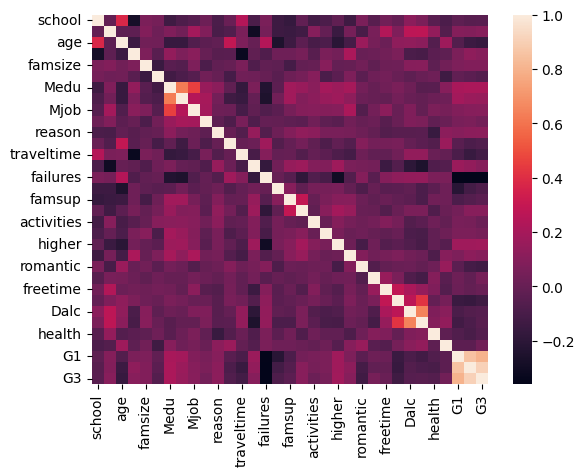

In [12]:
# check for outliers

sns.heatmap(df2.corr())
plt.show()

It appears that failures and age have no significant impact on G3

In [13]:
df["Fjob"].value_counts()

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

In [14]:
df["Mjob"].value_counts()

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

<Axes: xlabel='school', ylabel='count'>

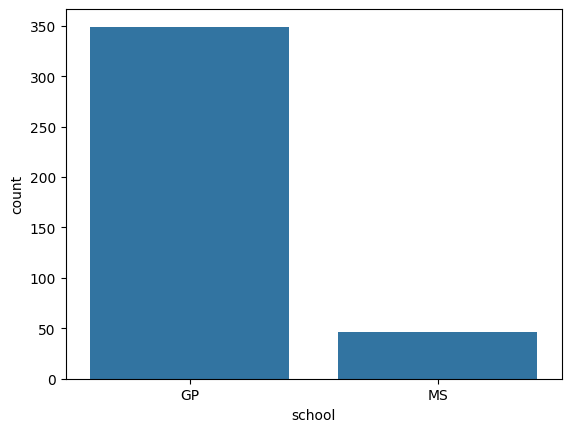

In [15]:
sns.countplot(x ="school",data= df)

In [16]:
df["sex"].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

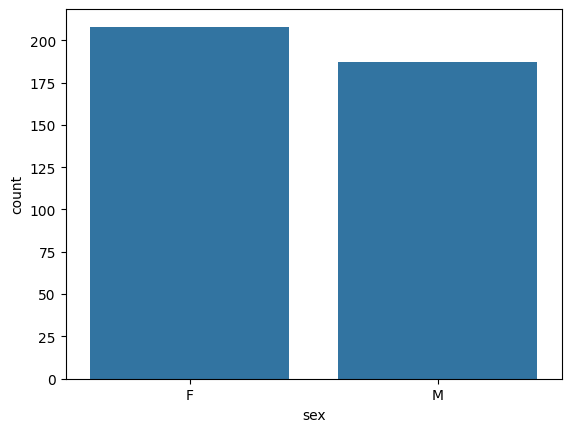

In [17]:
sns.countplot(x="sex",data =df)

C:\Users\Ranga Dananjaya\AppData\Local\Temp\ipykernel_19232\316555093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

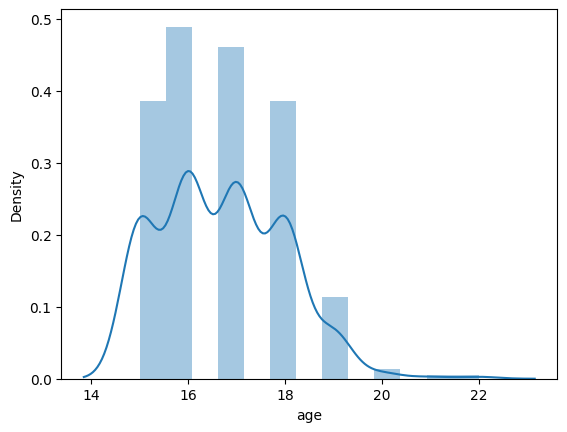

In [18]:
sns.distplot(df["age"])

<Axes: ylabel='Frequency'>

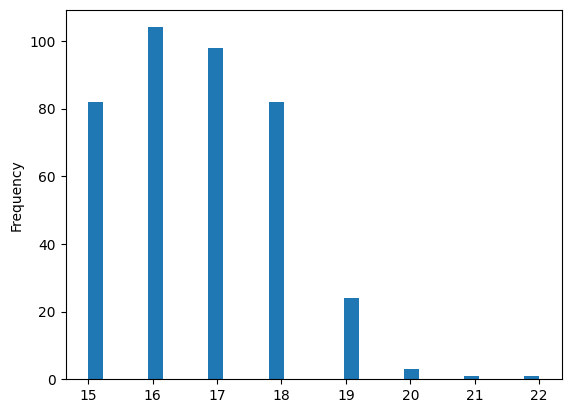

In [19]:
df["age"].plot.hist(bins =30)

In [20]:
df["address"].value_counts()

address
U    307
R     88
Name: count, dtype: int64

<Axes: xlabel='address', ylabel='count'>

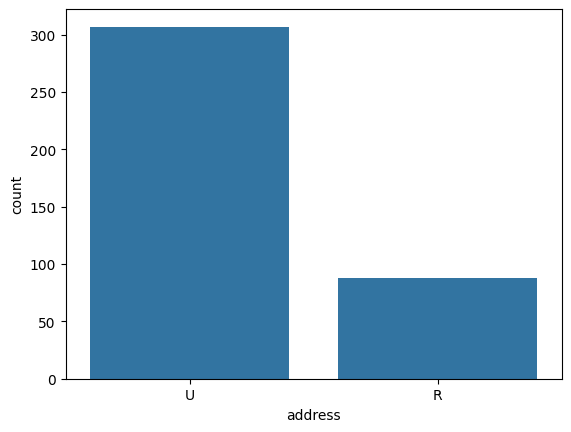

In [21]:
sns.countplot(x= "address", data=df)

In [22]:
df["famsize"].value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64

<Axes: xlabel='famsize', ylabel='count'>

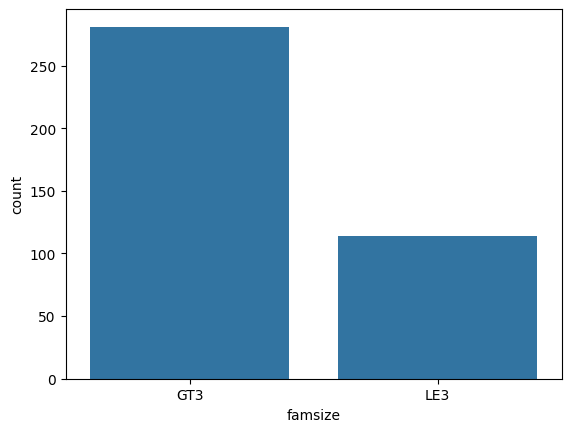

In [23]:
sns.countplot(x ="famsize", data =df)

In [24]:
df["Pstatus"].value_counts()

Pstatus
T    354
A     41
Name: count, dtype: int64

<Axes: xlabel='Pstatus', ylabel='count'>

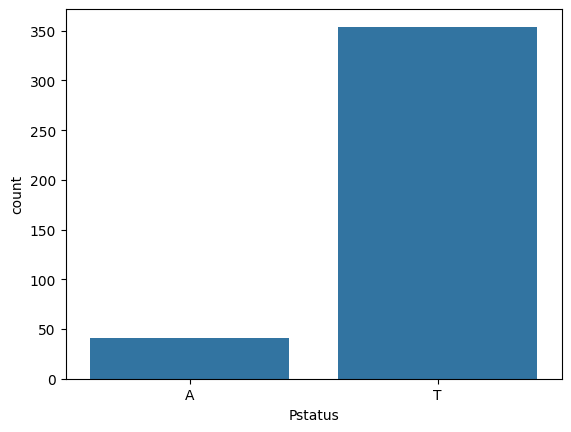

In [25]:
sns.countplot(x="Pstatus",data = df)

In [26]:
df["Medu"].value_counts()


Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

<Axes: xlabel='Medu', ylabel='count'>

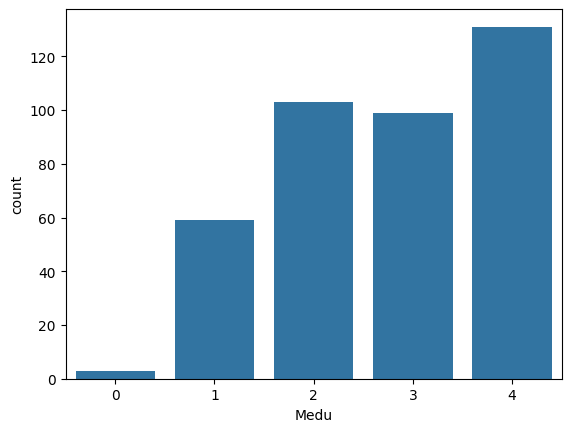

In [27]:
sns.countplot(x ="Medu",data = df)

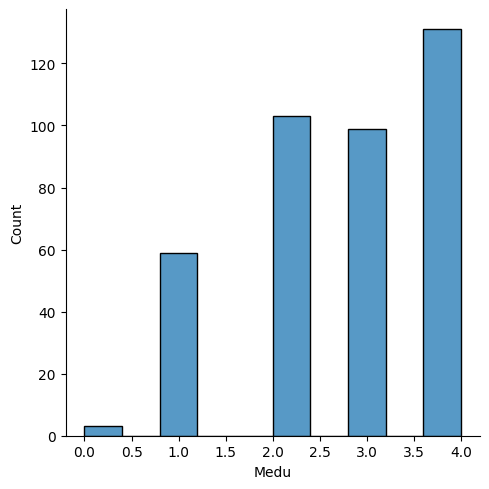

In [28]:
sns.displot(df["Medu"])

<Axes: ylabel='Medu'>

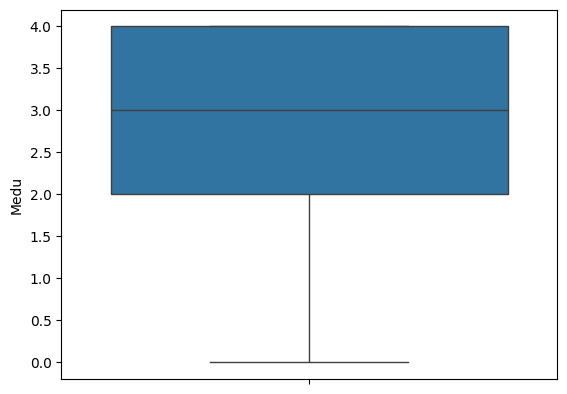

In [29]:
sns.boxplot(df["Medu"])

C:\Users\Ranga Dananjaya\AppData\Local\Temp\ipykernel_19232\1041029927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Medu"])


<Axes: xlabel='Medu', ylabel='Density'>

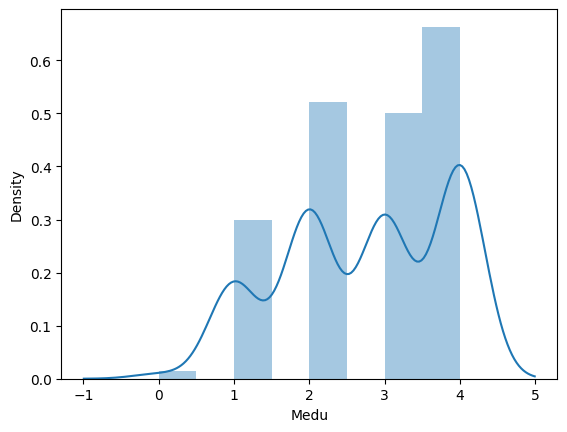

In [30]:
sns.distplot(df["Medu"])

<Axes: ylabel='Medu'>

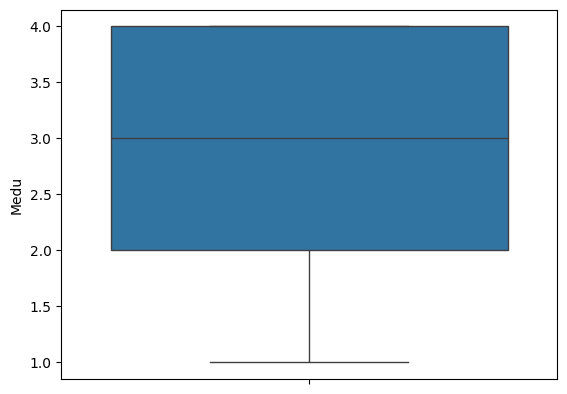

In [31]:
# remove outliers

df["Medu"] = np.where(df["Medu"] < 1, df["Medu"].median(), df["Medu"])


sns.boxplot(df["Medu"])

C:\Users\Ranga Dananjaya\AppData\Local\Temp\ipykernel_19232\1041029927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Medu"])


<Axes: xlabel='Medu', ylabel='Density'>

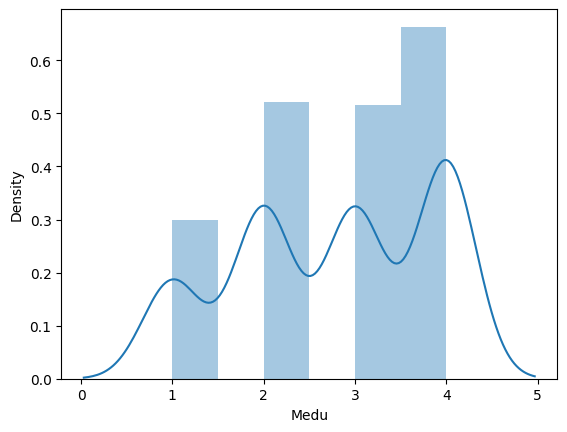

In [32]:
sns.distplot(df["Medu"])

In [33]:
df.shape

(395, 33)

C:\Users\Ranga Dananjaya\AppData\Local\Temp\ipykernel_19232\3782226016.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["G1"])


<Axes: xlabel='G1', ylabel='Density'>

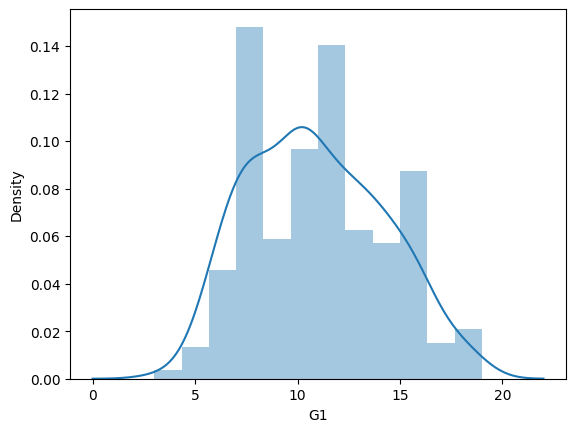

In [34]:
sns.distplot(data["G1"])

<Axes: ylabel='G3'>

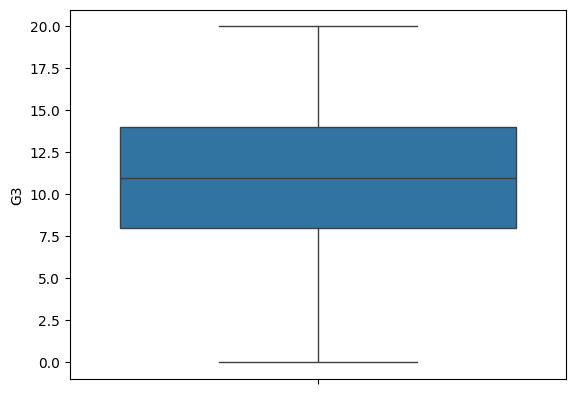

In [35]:
sns.boxplot(df["G3"])

<Axes: ylabel='G1'>

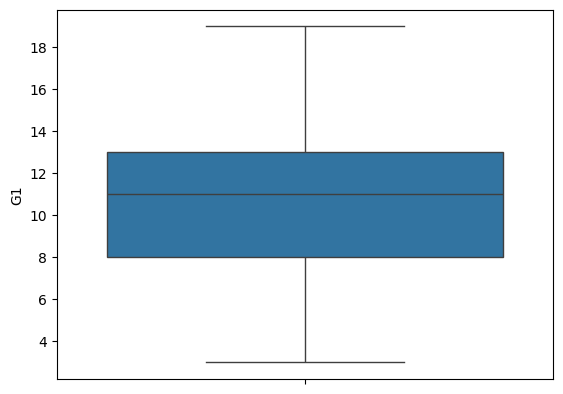

In [36]:
sns.boxplot(df["G1"])

<Axes: ylabel='G2'>

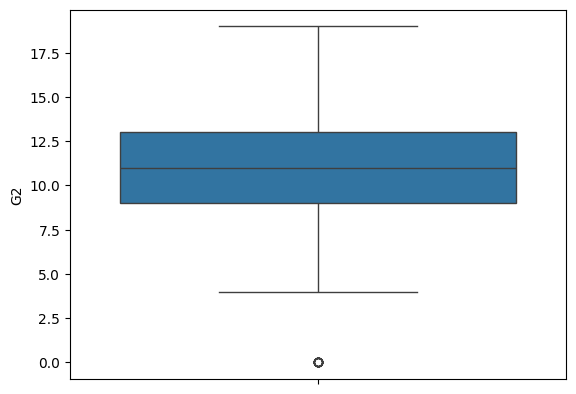

In [37]:
sns.boxplot(df["G2"])

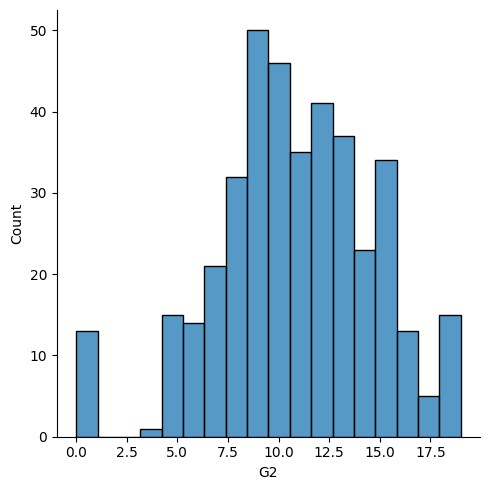

In [38]:
sns.displot(df["G2"])

<Axes: ylabel='G2'>

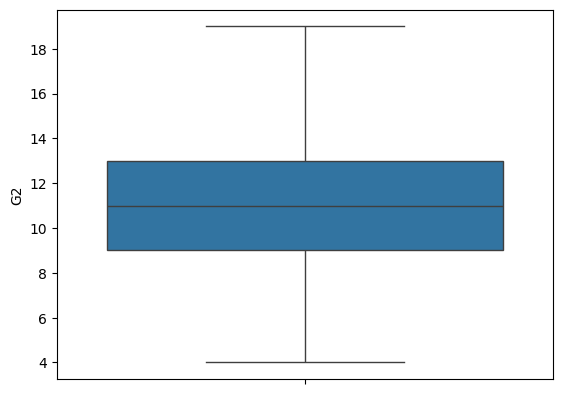

In [39]:
# remove outliers
df = df[df["G2"]>1.5]

# reset index
df.reset_index(drop=True, inplace=True)
sns.boxplot(df["G2"])

<Axes: ylabel='age'>

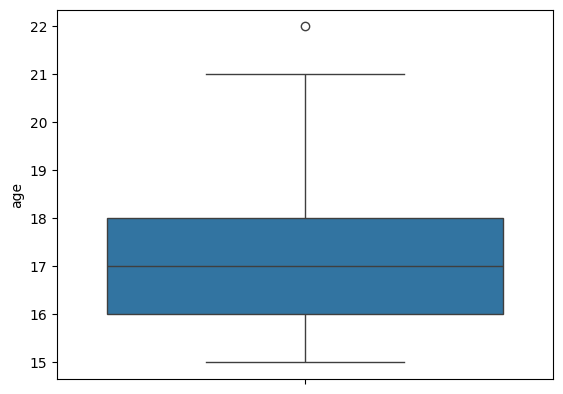

In [40]:
sns.boxplot(df["age"])

<Axes: ylabel='absences'>

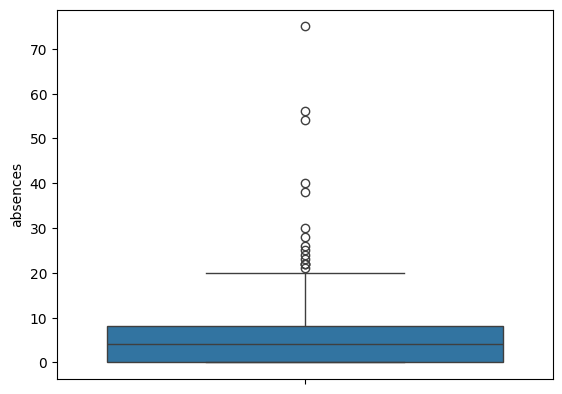

In [41]:
sns.boxplot(df["absences"])

<Axes: ylabel='absences'>

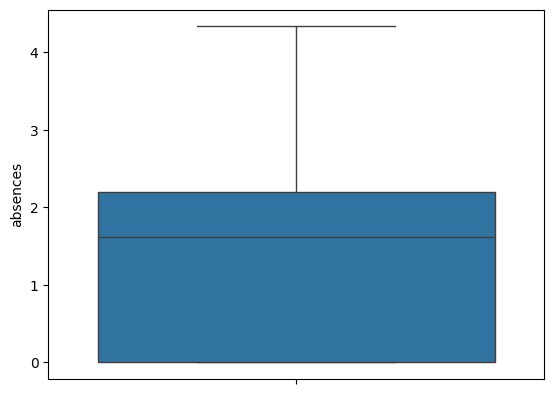

In [42]:
df["absences"] = np.log1p(df["absences"])
sns.boxplot(df["absences"])

C:\Users\Ranga Dananjaya\AppData\Local\Temp\ipykernel_19232\119306163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["G1"])


<Axes: xlabel='G1', ylabel='Density'>

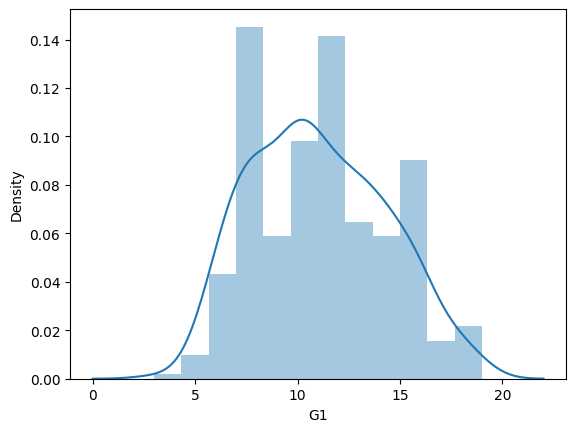

In [43]:
sns.distplot(df["G1"])

C:\Users\Ranga Dananjaya\AppData\Local\Temp\ipykernel_19232\3376494573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["G2"])


<Axes: xlabel='G2', ylabel='Density'>

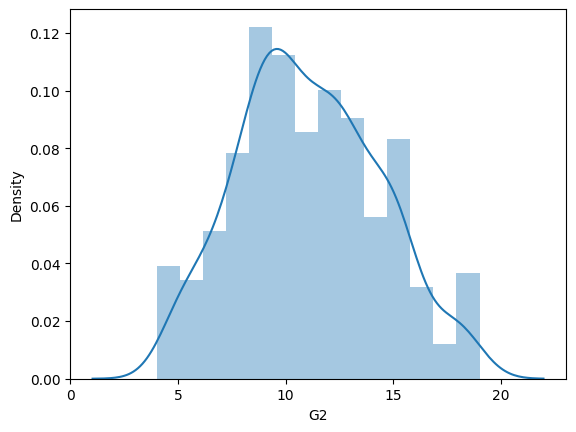

In [44]:
sns.distplot(df["G2"])

<Axes: ylabel='G3'>

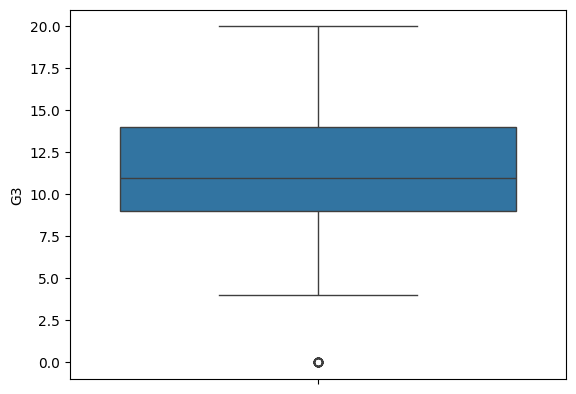

In [45]:
sns.boxplot(df["G3"])

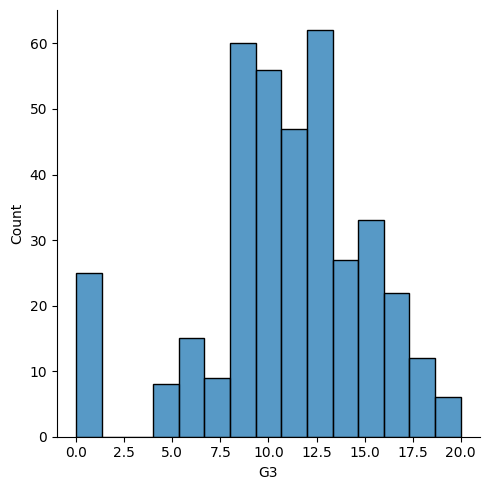

In [46]:
sns.displot(df["G3"])

<Axes: ylabel='G3'>

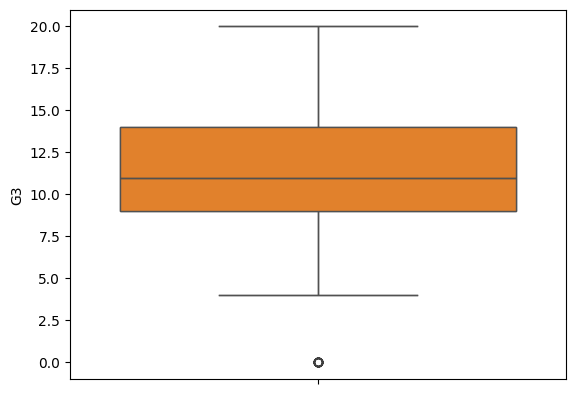

In [47]:
# remove outliers
sns.boxplot(df["G3"])
df = df[df["G3"]>2]
df.reset_index(drop=True, inplace=True)
sns.boxplot(df["G3"])

In [48]:
df.shape

(357, 33)

<Axes: ylabel='famrel'>

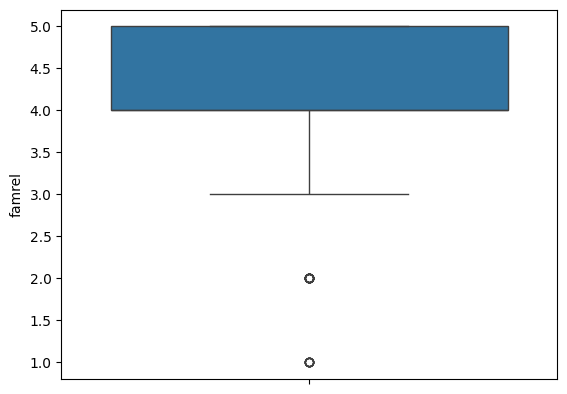

In [49]:

# df["famrel"] = data["famrel"]
sns.boxplot(df["famrel"])

<Axes: ylabel='famrel'>

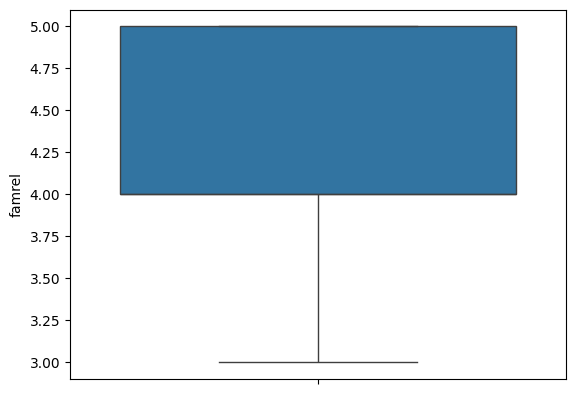

In [50]:
# remove outliers
df["famrel"] = np.where(df["famrel"] < 2.5, df["famrel"].median(), df["famrel"])

df.reset_index(drop=True, inplace=True)
sns.boxplot(df["famrel"])

In [51]:
df.shape

(357, 33)

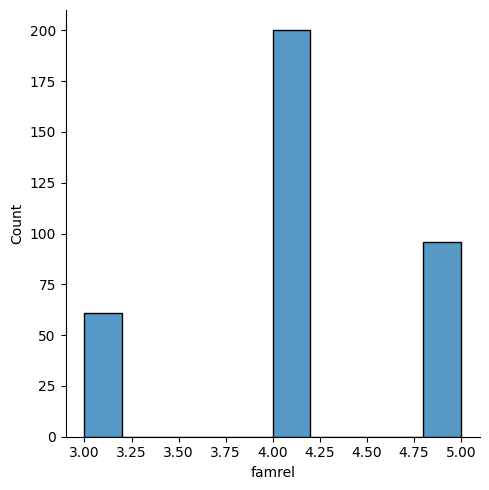

In [52]:
sns.displot(df["famrel"])

<Axes: ylabel='freetime'>

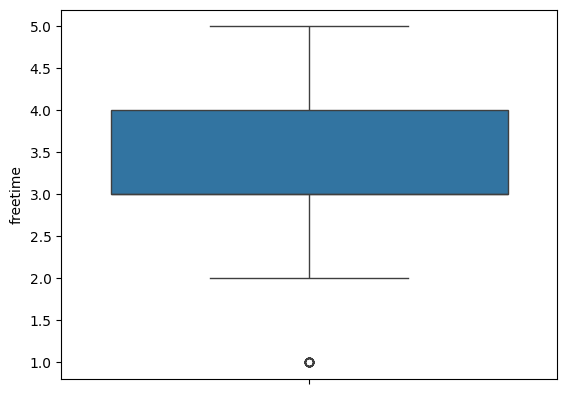

In [53]:
sns.boxplot(df["freetime"])

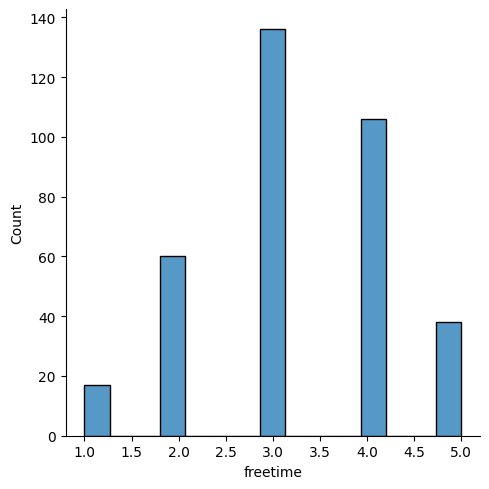

In [54]:
sns.displot(df["freetime"])

<Axes: ylabel='Dalc'>

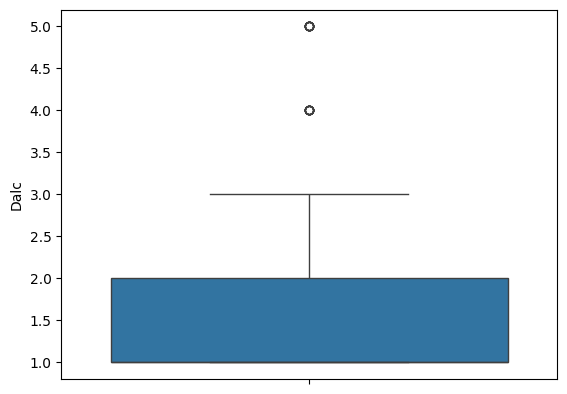

In [55]:
sns.boxplot(df["Dalc"])

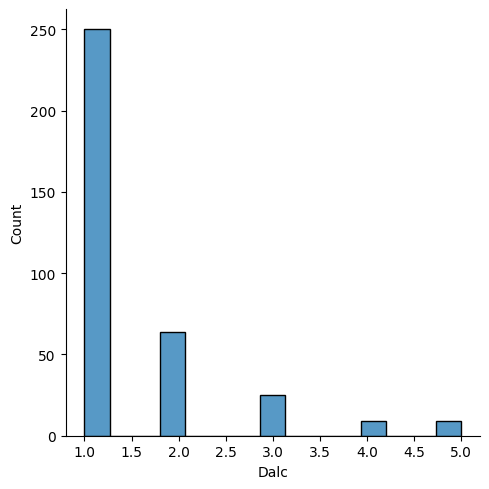

In [56]:
sns.displot(df["Dalc"])

<Axes: ylabel='Dalc'>

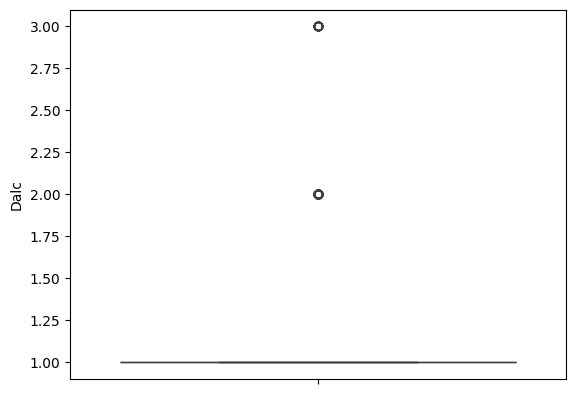

In [57]:
df["Dalc"] = np.where(df["Dalc"] > 3.8, df["Dalc"].median(), df["Dalc"])

df.reset_index(drop=True, inplace=True)
sns.boxplot(df["Dalc"])

# check poit

In [58]:
df.shape

(357, 33)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      357 non-null    object 
 1   sex         357 non-null    object 
 2   age         357 non-null    int64  
 3   address     357 non-null    object 
 4   famsize     357 non-null    object 
 5   Pstatus     357 non-null    object 
 6   Medu        357 non-null    float64
 7   Fedu        357 non-null    int64  
 8   Mjob        357 non-null    object 
 9   Fjob        357 non-null    object 
 10  reason      357 non-null    object 
 11  guardian    357 non-null    object 
 12  traveltime  357 non-null    int64  
 13  studytime   357 non-null    int64  
 14  failures    357 non-null    int64  
 15  schoolsup   357 non-null    object 
 16  famsup      357 non-null    object 
 17  paid        357 non-null    object 
 18  activities  357 non-null    object 
 19  nursery     357 non-null    o

In [60]:
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
185,GP,F,17,R,GT3,T,2.0,2,other,other,...,5.0,3,2,1.0,2,3,2.944439,7,6,6
168,GP,M,16,U,GT3,T,1.0,2,services,services,...,3.0,3,3,1.0,2,3,1.098612,11,12,11
349,MS,F,18,R,GT3,T,2.0,2,at_home,other,...,5.0,3,3,1.0,3,4,1.098612,10,9,10
30,GP,M,15,U,GT3,T,4.0,4,health,services,...,5.0,4,2,3.0,4,5,0.000000,9,11,12
9,GP,M,15,U,GT3,T,3.0,4,other,other,...,5.0,5,1,1.0,1,5,0.000000,14,15,15


## Using both encode method convert categorical data into numerical data

use labelEncode for "famsize" 

In [61]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["famsize"] = le.fit_transform(df["famsize"])




In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      357 non-null    object 
 1   sex         357 non-null    object 
 2   age         357 non-null    int64  
 3   address     357 non-null    object 
 4   famsize     357 non-null    int32  
 5   Pstatus     357 non-null    object 
 6   Medu        357 non-null    float64
 7   Fedu        357 non-null    int64  
 8   Mjob        357 non-null    object 
 9   Fjob        357 non-null    object 
 10  reason      357 non-null    object 
 11  guardian    357 non-null    object 
 12  traveltime  357 non-null    int64  
 13  studytime   357 non-null    int64  
 14  failures    357 non-null    int64  
 15  schoolsup   357 non-null    object 
 16  famsup      357 non-null    object 
 17  paid        357 non-null    object 
 18  activities  357 non-null    object 
 19  nursery     357 non-null    o

In [63]:
df_final =df.copy()
df_final.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
264,GP,M,18,U,1,A,4.0,4,teacher,teacher,...,5.0,4,3,1.0,1,2,2.302585,15,13,15
244,GP,M,18,U,0,T,4.0,2,health,other,...,5.0,4,5,1.0,3,5,2.397895,10,9,10
82,GP,F,15,U,1,T,3.0,2,services,other,...,4.0,4,4,1.0,1,5,2.397895,7,6,6
133,GP,M,16,U,1,T,2.0,2,services,services,...,4.0,3,3,2.0,2,2,2.197225,9,9,9
41,GP,M,15,U,1,T,4.0,4,teacher,other,...,5.0,4,3,2.0,4,5,2.197225,12,12,12


apply OneHot Encoding method for others data 

In [64]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()



# Encode 'sex' column
D_sex = ohe.fit_transform(df[["sex"]]).toarray()
df_sex = pd.DataFrame(D_sex, columns=ohe.categories_)

# Encode 'school' column
D_school = ohe.fit_transform(df[["school"]]).toarray()
df_school = pd.DataFrame(D_school, columns=ohe.categories_)

# Encode 'address' column
D_address = ohe.fit_transform(df[["address"]]).toarray()
df_address = pd.DataFrame(D_address, columns=ohe.categories_)

# Encode 'Pstatus' column
D_Pstatus = ohe.fit_transform(df[["Pstatus"]]).toarray()
df_Pstatus = pd.DataFrame(D_Pstatus, columns=ohe.categories_)

# Encode 'Mjob' column
D_Mjob = ohe.fit_transform(df[["Mjob"]]).toarray()
df_Mjob = pd.DataFrame(D_Mjob, columns=ohe.categories_)

# Encode 'Fjob' column
D_Fjob = ohe.fit_transform(df[["Fjob"]]).toarray()
df_Fjob = pd.DataFrame(D_Fjob, columns=ohe.categories_)

# Encode 'romantic' column
D_romantic = ohe.fit_transform(df[["romantic"]]).toarray()
df_romantic = pd.DataFrame(D_romantic, columns=ohe.categories_)

# Encode 'internet' column
D_internet = ohe.fit_transform(df[["internet"]]).toarray()
df_internet = pd.DataFrame(D_internet, columns=ohe.categories_)

# Encode 'higher' column
D_higher = ohe.fit_transform(df[["higher"]]).toarray()
df_higher = pd.DataFrame(D_higher, columns=ohe.categories_)

# Encode 'nursery' column
D_nursery = ohe.fit_transform(df[["nursery"]]).toarray()
df_nursery = pd.DataFrame(D_nursery, columns=ohe.categories_)

# Encode 'activities' column
D_activities = ohe.fit_transform(df[["activities"]]).toarray()
df_activities = pd.DataFrame(D_activities, columns=ohe.categories_)

# Encode 'paid' column
D_paid = ohe.fit_transform(df[["paid"]]).toarray()
df_paid = pd.DataFrame(D_paid, columns=ohe.categories_)

# Encode 'guardian' column
D_guardian = ohe.fit_transform(df[["guardian"]]).toarray()
df_guardian = pd.DataFrame(D_guardian, columns=ohe.categories_)

# Encode 'reason' column
D_reason = ohe.fit_transform(df[["reason"]]).toarray()
df_reason = pd.DataFrame(D_reason, columns=ohe.categories_)

D_famsup = ohe.fit_transform(df[["famsup"]]).toarray()
df_famsup = pd.DataFrame(D_famsup, columns=ohe.categories_)

D_schoolsup = ohe.fit_transform(df[["schoolsup"]]).toarray()
df_schoolsup = pd.DataFrame(D_schoolsup, columns=ohe.categories_)



In [65]:
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
171,GP,M,17,R,0,T,1.0,2,at_home,other,...,3.0,1,3,1.0,5,3,1.609438,8,9,10
334,MS,F,18,R,0,T,4.0,4,other,teacher,...,3.0,2,2,1.0,2,5,2.397895,14,12,11
292,GP,F,17,U,0,A,4.0,3,services,services,...,5.0,2,2,1.0,2,5,3.178054,13,13,13
339,MS,F,18,R,1,T,4.0,4,other,other,...,5.0,4,4,1.0,1,1,0.000000,19,18,19
132,GP,F,15,U,0,T,4.0,4,teacher,teacher,...,4.0,3,2,1.0,1,5,0.000000,16,16,15


before combine encoded data df data type

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      357 non-null    object 
 1   sex         357 non-null    object 
 2   age         357 non-null    int64  
 3   address     357 non-null    object 
 4   famsize     357 non-null    int32  
 5   Pstatus     357 non-null    object 
 6   Medu        357 non-null    float64
 7   Fedu        357 non-null    int64  
 8   Mjob        357 non-null    object 
 9   Fjob        357 non-null    object 
 10  reason      357 non-null    object 
 11  guardian    357 non-null    object 
 12  traveltime  357 non-null    int64  
 13  studytime   357 non-null    int64  
 14  failures    357 non-null    int64  
 15  schoolsup   357 non-null    object 
 16  famsup      357 non-null    object 
 17  paid        357 non-null    object 
 18  activities  357 non-null    object 
 19  nursery     357 non-null    o

In [67]:
# combine encoded data with df
df_final = pd.concat([df_sex, df_school, df_address, df_Pstatus, df_Mjob, df_Fjob,
                      df_romantic, df_internet, df_higher, df_nursery, df_activities,
                      df_paid, df_guardian, df_reason,df_famsup,df_schoolsup, df], axis=1)



In [68]:
df_final.sample(10)

,"(F,)","(M,)","(GP,)","(MS,)","(R,)","(U,)","(A,)","(T,)","(at_home,)","(health,)",...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
126,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5.0,3,2,1.0,1,1,0.000000,7,10,11
133,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,3,3,2.0,2,2,2.197225,9,9,9
110,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5.0,5,3,1.0,1,4,1.945910,18,19,19
90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,3,3,1.0,3,4,0.000000,7,7,8
61,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5.0,5,5,1.0,5,5,1.945910,10,8,11
267,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5.0,4,3,1.0,1,5,2.564949,12,12,13
167,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,3,4,2.0,3,4,2.564949,12,12,11
28,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5.0,3,3,1.0,1,5,1.609438,11,11,11
140,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4.0,2,1,2.0,3,3,2.197225,10,10,10
43,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5.0,4,1,1.0,1,1,0.000000,8,8,11


In [69]:
# List of original columns that were encoded
columns_to_drop = ["sex", "school", "address", "Pstatus", "Mjob", "Fjob", 
                   "romantic", "internet", "higher", "nursery", "activities", 
                   "paid", "guardian", "reason","famsup","schoolsup"]

# Drop the original columns that were encoded
df_final.drop(columns=columns_to_drop, inplace=True)


In [70]:
df_final.sample(10)


,"(F,)","(M,)","(GP,)","(MS,)","(R,)","(U,)","(A,)","(T,)","(at_home,)","(health,)",...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
19,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,3.0,1,3,1.0,3,5,1.609438,8,10,10
287,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,1,2,1.0,1,3,2.708050,15,13,13
35,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,5,1,1.0,1,5,0.000000,8,7,6
278,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,4,4,1.0,1,3,3.044522,15,14,13
118,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,5.0,2,4,1.0,4,5,3.044522,9,7,8
353,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,4,5,3.0,4,2,1.386294,14,16,16
335,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,2,2,1.0,1,3,1.609438,7,7,9
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,3,2,1.0,2,5,1.609438,6,10,10
293,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,2,2,1.0,1,3,2.564949,11,9,9
187,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,4,3,3.0,4,5,3.367296,10,9,9


In [71]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (F,)           357 non-null    float64
 1   (M,)           357 non-null    float64
 2   (GP,)          357 non-null    float64
 3   (MS,)          357 non-null    float64
 4   (R,)           357 non-null    float64
 5   (U,)           357 non-null    float64
 6   (A,)           357 non-null    float64
 7   (T,)           357 non-null    float64
 8   (at_home,)     357 non-null    float64
 9   (health,)      357 non-null    float64
 10  (other,)       357 non-null    float64
 11  (services,)    357 non-null    float64
 12  (teacher,)     357 non-null    float64
 13  (at_home,)     357 non-null    float64
 14  (health,)      357 non-null    float64
 15  (other,)       357 non-null    float64
 16  (services,)    357 non-null    float64
 17  (teacher,)     357 non-null    float64
 18  (no,)     

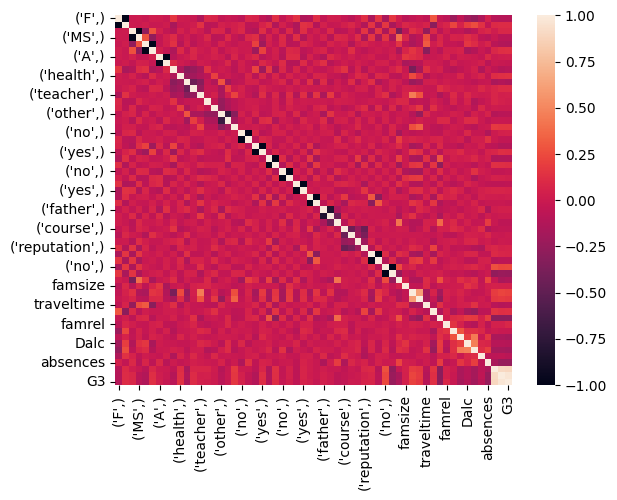

In [72]:
sns.heatmap(df_final.corr())
plt.show()

In [73]:
#Since  above we sow that 'failures' AND "age" are no large effect for G3 
# Drop 'failures' AND "age"  column from data set 
df_final.drop(columns=['failures'], inplace=True)
df_final.drop(columns=['age'], inplace=True)

In [74]:
df_final.sample(5)

,"(F,)","(M,)","(GP,)","(MS,)","(R,)","(U,)","(A,)","(T,)","(at_home,)","(health,)",...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
342,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,5.0,4,3,3.0,4,2,1.609438,8,9,10
243,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4.0,3,4,2.0,2,4,2.197225,12,10,11
308,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,3,4,1.0,3,3,1.609438,11,12,11
194,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,3,4,1.0,1,4,0.000000,12,13,14
179,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3.0,3,4,3.0,5,3,2.197225,9,9,10


Marks are 0 to 20

So we Category this marks into 4 

Mark>15 => A ,
10<Mark<=15  => B ,
5<Mark <= 10 => C ,
Mark < 5 => E

In [75]:
def categorize_grade(G3_value):
    if G3_value > 15:
        return "A"
    elif 10 < G3_value <= 15:
        return "B"
    elif 5 < G3_value <= 10:
        return "C"
    else:
        return "E"  

# Apply the categorization function to create a new column 'grade'
df_final['G3'] = df_final['G3'].apply(categorize_grade)


In [76]:
df_final.sample(5)

,"(F,)","(M,)","(GP,)","(MS,)","(R,)","(U,)","(A,)","(T,)","(at_home,)","(health,)",...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
342,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,5.0,4,3,3.0,4,2,1.609438,8,9,C
78,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,5,1,1.0,1,3,1.098612,8,8,C
38,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4.0,3,2,1.0,1,5,1.098612,12,12,B
143,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4.0,2,2,3.0,3,5,2.197225,16,12,B
52,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,5.0,5,5,3.0,4,5,1.945910,11,11,C


In [77]:
df_final.shape

(357, 56)

## Final Prediction

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


df_final.columns = df_final.columns.astype(str)

features = df_final.drop(columns=['G3'])
target = df_final['G3']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

#  predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy Score (SVM):", accuracy_svm)


Accuracy Score (SVM): 0.8472222222222222


In [79]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_svm)

array([[ 3,  3,  0,  0],
       [ 0, 32,  3,  0],
       [ 0,  3, 26,  0],
       [ 0,  0,  2,  0]], dtype=int64)